<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/1.%20TFIM%20VQE%20COPY%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [2]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H = -(1-g) Σ Z_j Z_{j+1} -g Σ X_j  $$

1D 5 Qubit System

In [4]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [5]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.155367074350501

In [6]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.026674183332294

# VQE in Exact Simulator (Method 1)

quantum_algorithms VQE object

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
import numpy as np

# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

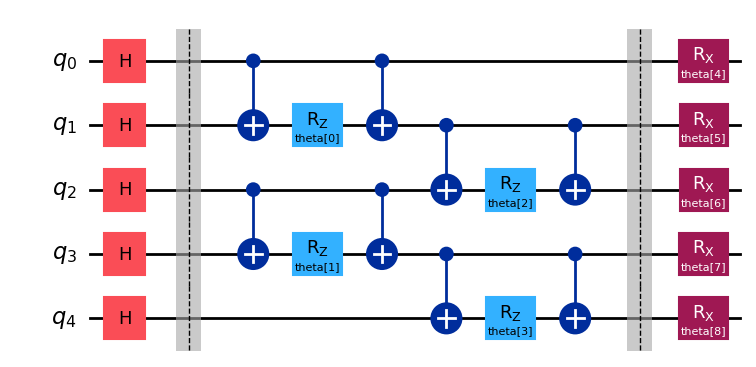

In [ ]:
ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
from qiskit_algorithms.optimizers import CG
from qiskit_algorithms import VQE, SamplingVQE
from qiskit_algorithms.gradients import LinCombEstimatorGradient
from qiskit.primitives import Estimator

step_list = np.array([i for i in range(20)])
vqe_list = []

for max in range(20):

  # Conjugate Gradient algorithm
  optimizer = CG(maxiter=max)

  # Gradient callable
  estimator = Estimator()
  grad = LinCombEstimatorGradient(estimator)  # optional estimator gradient
  vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer, gradient=grad)

  result = vqe.compute_minimum_eigenvalue(hamiltonian)
  vqe_list.append(result.optimal_value)

vqe_list = np.array(vqe_list)

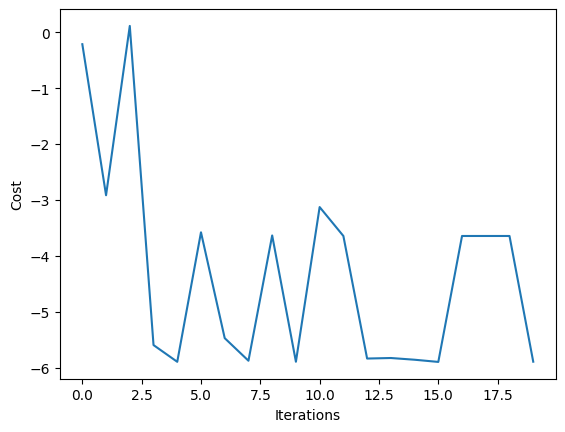

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(step_list, vqe_list)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# VQE in Exact Simulator (Method 2)

scipy minimize

## Function Definition

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator

import numpy as np
from scipy.optimize import minimize

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

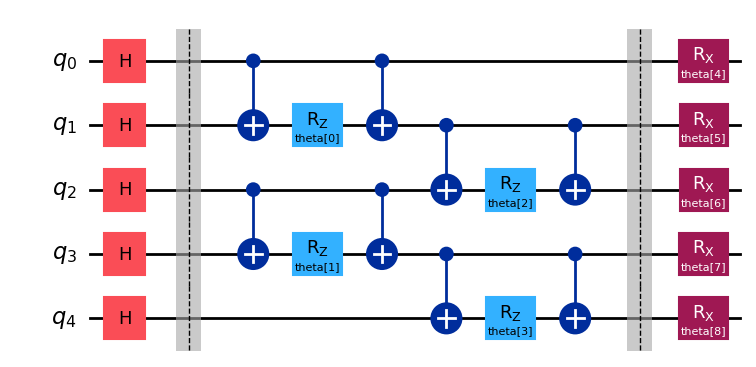

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
# Estimator

estimator = Estimator()

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [ ]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Minimizing Method Trial

COBYLA, SLSQP, BFGS

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -5.8686873148044505
       x: [ 5.837e+00  6.673e+00  3.926e-01  4.467e-01 -9.710e-01
            2.544e+00  2.177e+00  2.548e+00  2.166e+00]
    nfev: 1000
   maxcv: 0.0

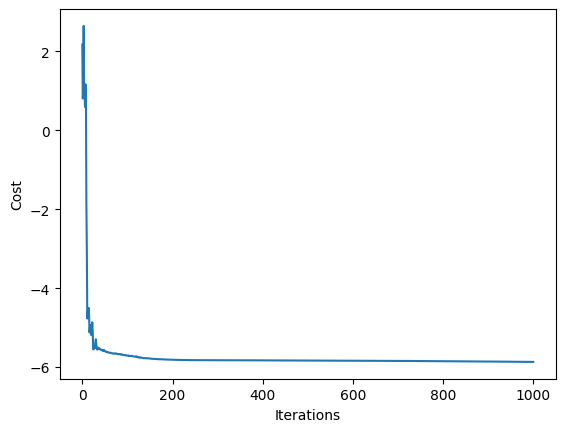

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="SLSQP",
  callback=callback,
)

In [ ]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -5.897229043538905
       x: [-4.799e-01  1.296e+01  3.976e-01 -6.763e+00  1.571e+00
            4.614e-04 -1.571e+00  7.090e-04  1.570e+00]
     nit: 26
     jac: [-2.710e-04 -2.074e-04  1.441e-04 -7.761e-05  1.005e-04
            1.032e-04  1.562e-05  1.583e-04  4.566e-05]
    nfev: 262
    njev: 26

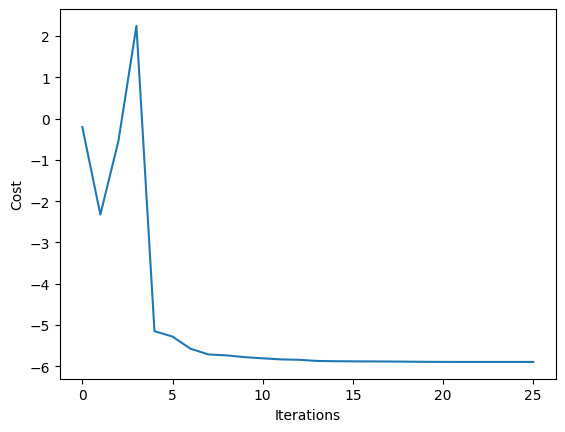

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="BFGS",
  callback=callback,
)

In [ ]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.8972291332413995
        x: [ 4.797e-01 -3.975e-01  6.681e+00  5.803e+00 -4.712e+00
             3.142e+00  1.571e+00 -1.721e-05  1.571e+00]
      nit: 28
      jac: [ 8.702e-06 -5.484e-06 -6.437e-06  4.053e-06  4.768e-07
            -3.338e-06 -5.245e-06 -2.384e-06  2.146e-06]
 hess_inv: [[ 4.495e-01  2.533e-02 ...  4.487e-02 -1.532e-01]
            [ 2.533e-02  4.622e-01 ... -7.152e-02  1.585e-01]
            ...
            [ 4.487e-02 -7.152e-02 ...  6.177e+00 -5.512e+00]
            [-1.532e-01  1.585e-01 ... -5.512e+00  6.966e+00]]
     nfev: 340
     njev: 34

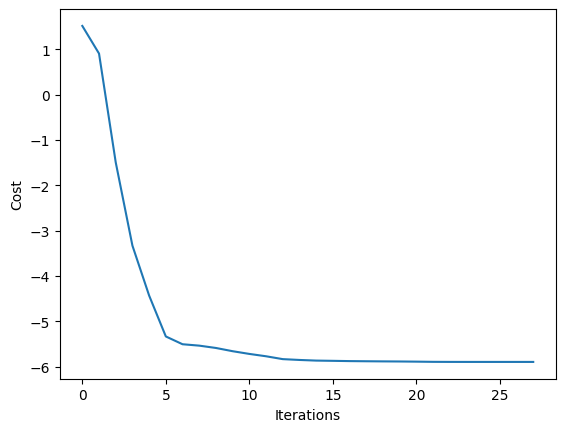

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

## Finding Seed of np.random.seed

In [ ]:
local_minimum_list = []
seed_list = []
k = 0

while (len(seed_list)<120) :

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  if local_minimum_dict[-1] < -5 :
    seed_list.append(k)

  k = k + 1


local_minimum_list = np.array(local_minimum_list)
seed_list = np.array(seed_list)

In [ ]:
local_minimum_list

array([-3.64352019, -5.82879886, -3.64352019, -3.64352019, -5.89649831,
       -5.89460313, -5.87216999, -5.89714665, -5.8970116 , -3.64352019,
       -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631,
       -5.89706667, -3.64352018, -5.89640049, -5.89686096, -5.84344741,
       -5.89722894, -5.89514208, -3.64352019, -5.89722285, -5.89281514,
       -5.8954058 , -3.64352018, -5.89660128, -5.89722463, -5.8262015 ,
       -5.89560605, -5.83363386, -3.64352019, -3.64352019, -5.87957003,
       -3.64352019, -5.82656423, -5.89196626, -5.82341307, -5.8972198 ,
       -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954,
       -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387,
       -3.64352019, -5.89720651, -5.86661138, -3.57102188, -3.00057907,
       -5.89703354, -5.8971071 , -3.26759188, -3.64348142, -5.89488588,
       -3.64351983, -5.88977925, -3.64208323, -5.89321505, -3.48455584,
       -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89

In [ ]:
seed_list

array([  1,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,  17,
        18,  19,  20,  21,  23,  24,  25,  27,  28,  29,  30,  31,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  51,  52,  55,  56,  59,  61,  63,  65,  66,  67,  68,  69,
        70,  71,  74,  75,  76,  77,  78,  81,  86,  87,  90,  93,  95,
        96,  97,  99, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111,
       112, 113, 114, 115, 116, 118, 119, 121, 124, 125, 126, 127, 128,
       131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 144, 147,
       148, 149, 150, 151, 152, 154, 155, 157, 162, 165, 166, 169, 171,
       172, 174, 177])

# VQE in Noisy Simulator (Trial)

scipy minimize method trial ("cobyla", "bfsd", "slsqp")

## Function Definition

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

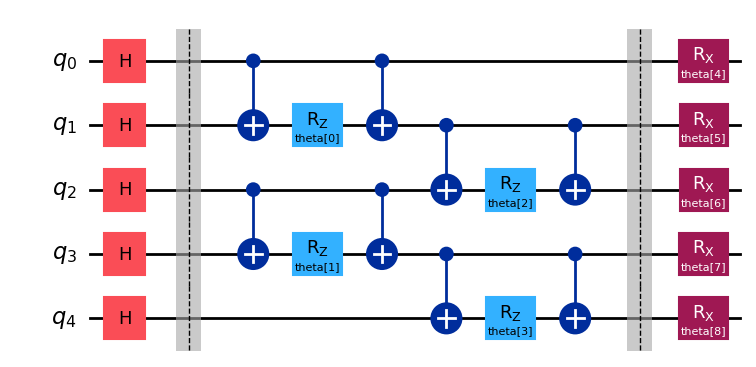

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
cx_depolarizing_prob = 0.02


# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'cx', 'measure', 'u1', 'reset', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [ ]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Minimizing Method Trial

COBYLA, SLSQP, BFGS

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(5)
x0 = 2 * np.pi * np.random.random(9)

x0

array([1.39482423, 5.47097243, 1.29885476, 5.77180256, 3.06877801,
       3.84370005, 4.81234099, 3.25731628, 1.86485255])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.833984375
       x: [-1.772e-01  6.251e+00  4.286e-01  6.645e+00  2.471e+00
            5.300e+00  5.802e+00  2.812e+00  1.528e+00]
    nfev: 105
   maxcv: 0.0

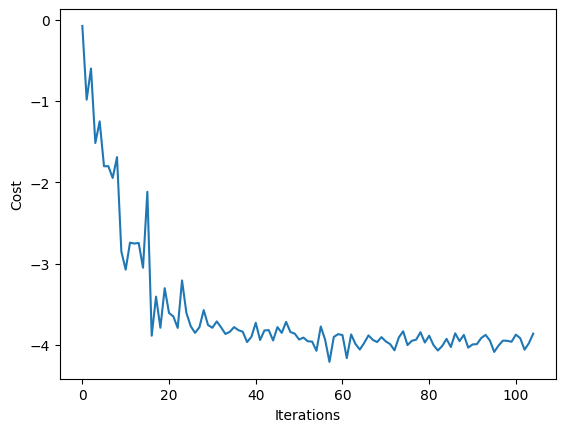

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="SLSQP",
  callback=callback,
)

In [ ]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.490234375
       x: [-7.691e+05  9.834e+06  1.536e+07 -5.090e+06 -1.904e+07
            3.058e+07  2.420e+07 -1.903e+07  1.292e+07]
     nit: 46
     jac: [ 1.717e+07  7.602e+06  1.075e+07  1.363e+07  1.337e+07
            1.206e+07  1.901e+07  1.049e+07  1.835e+06]
    nfev: 921
    njev: 46

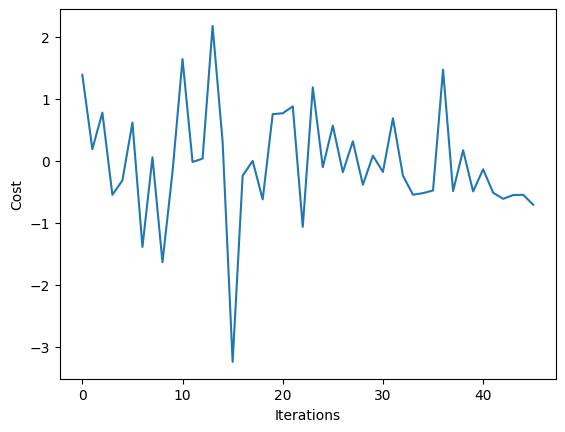

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="BFGS",
  callback=callback,
)

In [ ]:
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.837890625
        x: [ 2.620e+00  4.526e+00  7.186e-04  1.900e+00  9.221e-01
             5.802e-01  1.170e+00  2.171e+00  2.493e+00]
      nit: 1
      jac: [ 5.898e+06 -7.995e+06  1.324e+07  7.340e+06  3.932e+06
             4.063e+06 -1.835e+06 -9.961e+06  1.704e+06]
 hess_inv: [[ 1.219e+00 -9.976e-03 ...  1.791e-02  1.384e-01]
            [-9.976e-03  7.765e-01 ... -3.035e-01 -6.494e-02]
            ...
            [ 1.791e-02 -3.035e-01 ...  5.923e-01 -6.794e-02]
            [ 1.384e-01 -6.494e-02 ... -6.794e-02  1.072e+00]]
     nfev: 221
     njev: 21

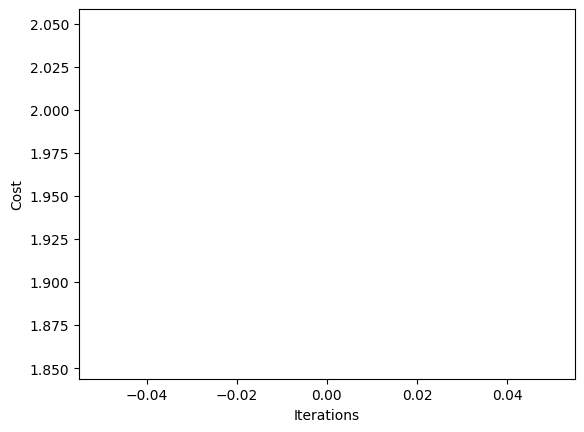

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# VQE in Noisy Simulator (Various types of error)

scipy minimize method "cobyla"

## Function Setting

In [7]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [8]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

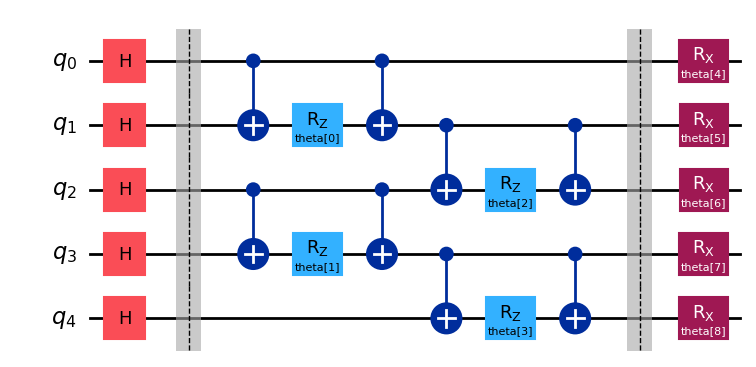

In [9]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [10]:
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

In [11]:
seed_list = [1,   4,   5,   6,   7,   8,  10,  11,  12,  13,
14,  15,  17,  18,  19,  20,  21,  23,  24,  25,
27,  28,  29,  30,  31,  34,  36,  38,  39,  40,
41,  42,  43,  45,  46,  47,  48,  49,  51,  52,
55,  59,  61,  63,  65,  66,  67,  68,  70,  71,
74,  75,  76,  77,  78,  81,  86,  87,  90,  93,
95,  96,  97,  101, 102, 103, 104, 105, 106, 107,
112, 113, 114, 116, 118, 121, 124, 126, 127, 128,
132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
144, 147, 148, 149, 150, 151, 152, 154, 155, 162,
165, 166, 169, 171, 172, 174]

## Ideal Simulator

In [12]:
noise_model = NoiseModel()

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [13]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [14]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [15]:
mean_ideal = np.mean(local_minimum_list)
var_ideal = np.var(local_minimum_list)
max_ideal = np.max(local_minimum_list)
min_ideal = np.min(local_minimum_list)

print("mean : {0}".format(mean_ideal))
print("variance : {0}".format(var_ideal))
print("maximum : {0}".format(max_ideal))
print("minimum : {0}".format(min_ideal))
print()
print(local_minimum_list)

mean : -5.7790824999999995
variance : 0.008404233818749992
maximum : -5.449750000000001
minimum : -5.90325

[-5.723   -5.86275 -5.71075 -5.82475 -5.86225 -5.87675 -5.7625  -5.84475
 -5.83475 -5.70975 -5.8365  -5.867   -5.8535  -5.75825 -5.688   -5.8685
 -5.66375 -5.864   -5.7965  -5.80675 -5.87375 -5.865   -5.809   -5.6275
 -5.637   -5.7915  -5.6225  -5.81875 -5.7755  -5.8245  -5.845   -5.719
 -5.855   -5.818   -5.82925 -5.46875 -5.86575 -5.645   -5.849   -5.68875
 -5.67775 -5.686   -5.79125 -5.69875 -5.666   -5.89375 -5.90325 -5.8385
 -5.6245  -5.818   -5.77925 -5.8205  -5.86575 -5.68725 -5.79275 -5.863
 -5.65575 -5.759   -5.88875 -5.7025  -5.65    -5.85575 -5.85125 -5.80325
 -5.7465  -5.794   -5.636   -5.576   -5.86925 -5.87575 -5.8055  -5.727
 -5.8785  -5.82125 -5.80275 -5.80125 -5.861   -5.76975 -5.77375 -5.71525
 -5.851   -5.791   -5.88625 -5.7815  -5.74225 -5.6115  -5.8355  -5.68225
 -5.89175 -5.81325 -5.44975 -5.872   -5.8725  -5.76    -5.82275 -5.81675
 -5.76625 -5.852   -5.786

In [16]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(seed_list[72])
x0 = 2 * np.pi * np.random.random(9)

callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

options = dict()
options["maxiter"] = 400
options["disp"] = True

res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
)

In [17]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.878500000000001
       x: [-4.775e-01  6.702e+00  6.692e+00  5.673e+00  4.363e+00
            3.458e+00  1.274e+00  3.199e+00  4.746e+00]
    nfev: 116
   maxcv: 0.0

## Reset Error

In [18]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [19]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [20]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [21]:
mean_rst = np.mean(local_minimum_list)
var_rst = np.var(local_minimum_list)
max_rst = np.max(local_minimum_list)
min_rst = np.min(local_minimum_list)

print("mean : {0}".format(mean_rst))
print("variance : {0}".format(var_rst))
print("maximum : {0}".format(max_rst))
print("minimum : {0}".format(min_rst))
print()
print(local_minimum_list)

mean : -5.7790824999999995
variance : 0.008404233818749992
maximum : -5.449750000000001
minimum : -5.90325

[-5.723   -5.86275 -5.71075 -5.82475 -5.86225 -5.87675 -5.7625  -5.84475
 -5.83475 -5.70975 -5.8365  -5.867   -5.8535  -5.75825 -5.688   -5.8685
 -5.66375 -5.864   -5.7965  -5.80675 -5.87375 -5.865   -5.809   -5.6275
 -5.637   -5.7915  -5.6225  -5.81875 -5.7755  -5.8245  -5.845   -5.719
 -5.855   -5.818   -5.82925 -5.46875 -5.86575 -5.645   -5.849   -5.68875
 -5.67775 -5.686   -5.79125 -5.69875 -5.666   -5.89375 -5.90325 -5.8385
 -5.6245  -5.818   -5.77925 -5.8205  -5.86575 -5.68725 -5.79275 -5.863
 -5.65575 -5.759   -5.88875 -5.7025  -5.65    -5.85575 -5.85125 -5.80325
 -5.7465  -5.794   -5.636   -5.576   -5.86925 -5.87575 -5.8055  -5.727
 -5.8785  -5.82125 -5.80275 -5.80125 -5.861   -5.76975 -5.77375 -5.71525
 -5.851   -5.791   -5.88625 -5.7815  -5.74225 -5.6115  -5.8355  -5.68225
 -5.89175 -5.81325 -5.44975 -5.872   -5.8725  -5.76    -5.82275 -5.81675
 -5.76625 -5.852   -5.786

## Measurement Error

In [22]:
noise_model = NoiseModel()

# Example error probabilities
p_measure = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [23]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [24]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [25]:
mean_measure = np.mean(local_minimum_list)
var_measure = np.var(local_minimum_list)
max_measure = np.max(local_minimum_list)
min_measure = np.min(local_minimum_list)

print("mean : {0}".format(mean_measure))
print("variance : {0}".format(var_measure))
print("maximum : {0}".format(max_measure))
print("minimum : {0}".format(min_measure))
print()
print(local_minimum_list)

mean : -5.638239999999999
variance : 0.006621234899999987
maximum : -5.3715
minimum : -5.75625

[-5.558   -5.70425 -5.59875 -5.70875 -5.74325 -5.73775 -5.6585  -5.6595
 -5.71075 -5.55575 -5.5625  -5.66825 -5.6995  -5.553   -5.59    -5.72875
 -5.5855  -5.736   -5.64375 -5.60125 -5.733   -5.75625 -5.6975  -5.59125
 -5.48675 -5.662   -5.57125 -5.59925 -5.6805  -5.4205  -5.71275 -5.7175
 -5.724   -5.6745  -5.6865  -5.66775 -5.696   -5.5405  -5.49375 -5.50975
 -5.58475 -5.6845  -5.701   -5.5535  -5.5925  -5.747   -5.6925  -5.73075
 -5.50775 -5.69225 -5.596   -5.6945  -5.52125 -5.539   -5.64    -5.6985
 -5.727   -5.6415  -5.72925 -5.56425 -5.51975 -5.70225 -5.6985  -5.64225
 -5.641   -5.70975 -5.4985  -5.5105  -5.667   -5.49675 -5.6925  -5.7085
 -5.57175 -5.65875 -5.69025 -5.6215  -5.73075 -5.59775 -5.63675 -5.6585
 -5.67225 -5.63525 -5.49725 -5.71275 -5.61725 -5.3715  -5.71525 -5.5665
 -5.70575 -5.66725 -5.55075 -5.729   -5.73225 -5.612   -5.69425 -5.567
 -5.66875 -5.70075 -5.71425 -5.578  

## Bit Flip

In [26]:
noise_model = NoiseModel()

# Example error probabilities
p_bit = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [27]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [28]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [29]:
mean_bit = np.mean(local_minimum_list)
var_bit = np.var(local_minimum_list)
max_bit = np.max(local_minimum_list)
min_bit = np.min(local_minimum_list)

print("mean : {0}".format(mean_bit))
print("variance : {0}".format(var_bit))
print("maximum : {0}".format(max_bit))
print("minimum : {0}".format(min_bit))
print()
print(local_minimum_list)

mean : -5.665257499999999
variance : 0.006384240568749993
maximum : -5.313250000000001
minimum : -5.78125

[-5.606   -5.71875 -5.60175 -5.698   -5.78125 -5.767   -5.5845  -5.645
 -5.69425 -5.51475 -5.56775 -5.75575 -5.769   -5.57125 -5.64275 -5.74275
 -5.5175  -5.7255  -5.666   -5.73625 -5.723   -5.7545  -5.6705  -5.60075
 -5.52975 -5.6935  -5.61425 -5.6985  -5.69325 -5.6845  -5.73225 -5.72175
 -5.6815  -5.31325 -5.7015  -5.70625 -5.68925 -5.738   -5.71325 -5.672
 -5.66375 -5.618   -5.6725  -5.6015  -5.615   -5.7535  -5.52925 -5.767
 -5.736   -5.7325  -5.647   -5.6445  -5.72275 -5.55    -5.67225 -5.68075
 -5.7195  -5.6425  -5.7215  -5.60475 -5.72025 -5.709   -5.58275 -5.7115
 -5.7125  -5.6935  -5.6955  -5.53825 -5.53225 -5.52125 -5.64025 -5.644
 -5.7355  -5.6575  -5.6785  -5.56625 -5.762   -5.6985  -5.697   -5.63975
 -5.61525 -5.68075 -5.76425 -5.7605  -5.699   -5.57325 -5.707   -5.57125
 -5.74275 -5.68675 -5.4285  -5.7675  -5.76325 -5.6595  -5.71025 -5.66375
 -5.6435  -5.726   -5.6707

## Phase Flip

In [30]:
noise_model = NoiseModel()

# Example error probabilities
p_phase = 0.01

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [31]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [32]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [33]:
mean_phase = np.mean(local_minimum_list)
var_phase = np.var(local_minimum_list)
max_phase = np.max(local_minimum_list)
min_phase = np.min(local_minimum_list)

print("mean : {0}".format(mean_phase))
print("variance : {0}".format(var_phase))
print("maximum : {0}".format(max_phase))
print("minimum : {0}".format(min_phase))
print()
print(local_minimum_list)

mean : -5.665257499999999
variance : 0.006384240568749993
maximum : -5.313250000000001
minimum : -5.78125

[-5.606   -5.71875 -5.60175 -5.698   -5.78125 -5.767   -5.5845  -5.645
 -5.69425 -5.51475 -5.56775 -5.75575 -5.769   -5.57125 -5.64275 -5.74275
 -5.5175  -5.7255  -5.666   -5.73625 -5.723   -5.7545  -5.6705  -5.60075
 -5.52975 -5.6935  -5.61425 -5.6985  -5.69325 -5.6845  -5.73225 -5.72175
 -5.6815  -5.31325 -5.7015  -5.70625 -5.68925 -5.738   -5.71325 -5.672
 -5.66375 -5.618   -5.6725  -5.6015  -5.615   -5.7535  -5.52925 -5.767
 -5.736   -5.7325  -5.647   -5.6445  -5.72275 -5.55    -5.67225 -5.68075
 -5.7195  -5.6425  -5.7215  -5.60475 -5.72025 -5.709   -5.58275 -5.7115
 -5.7125  -5.6935  -5.6955  -5.53825 -5.53225 -5.52125 -5.64025 -5.644
 -5.7355  -5.6575  -5.6785  -5.56625 -5.762   -5.6985  -5.697   -5.63975
 -5.61525 -5.68075 -5.76425 -5.7605  -5.699   -5.57325 -5.707   -5.57125
 -5.74275 -5.68675 -5.4285  -5.7675  -5.76325 -5.6595  -5.71025 -5.66375
 -5.6435  -5.726   -5.6707

## Depolarization

In [34]:
noise_model = NoiseModel()

# Example error probabilities
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [35]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [36]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [37]:
mean_depo = np.mean(local_minimum_list)
var_depo = np.var(local_minimum_list)
max_depo = np.max(local_minimum_list)
min_depo = np.min(local_minimum_list)

print("mean : {0}".format(mean_depo))
print("variance : {0}".format(var_depo))
print("maximum : {0}".format(max_depo))
print("minimum : {0}".format(min_depo))
print()
print(local_minimum_list)

mean : -5.574622499999999
variance : 0.009950661868749986
maximum : -5.30525
minimum : -5.710000000000001

[-5.464   -5.5505  -5.50125 -5.64825 -5.70225 -5.70025 -5.43825 -5.57275
 -5.4745  -5.6055  -5.66075 -5.692   -5.68175 -5.47775 -5.317   -5.67375
 -5.529   -5.657   -5.55025 -5.46625 -5.69025 -5.67975 -5.631   -5.4515
 -5.412   -5.6265  -5.53575 -5.43025 -5.5855  -5.4955  -5.6855  -5.6505
 -5.672   -5.35175 -5.65225 -5.65475 -5.4135  -5.56525 -5.438   -5.6115
 -5.5225  -5.52325 -5.55525 -5.501   -5.3635  -5.70075 -5.649   -5.7025
 -5.4855  -5.625   -5.6135  -5.633   -5.43725 -5.46675 -5.6255  -5.704
 -5.432   -5.55775 -5.686   -5.511   -5.4655  -5.68625 -5.5895  -5.5275
 -5.5875  -5.432   -5.30525 -5.475   -5.6845  -5.6685  -5.56775 -5.686
 -5.502   -5.615   -5.6445  -5.5425  -5.67275 -5.57275 -5.614   -5.57625
 -5.68275 -5.572   -5.68975 -5.66025 -5.5175  -5.597   -5.653   -5.49375
 -5.71    -5.3725  -5.61425 -5.67175 -5.671   -5.55375 -5.63675 -5.5605
 -5.66775 -5.65575 -5.62475

## Summation of all-type Error & Conclusion

In [38]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01
p_measure = 0.01
p_bit = 0.01
p_phase = 0.01
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")

noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")

noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])

noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])

noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [39]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [40]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [41]:
mean_all = np.mean(local_minimum_list)
var_all = np.var(local_minimum_list)
max_all = np.max(local_minimum_list)
min_all = np.min(local_minimum_list)

print("mean : {0}".format(mean_all))
print("variance : {0}".format(var_all))
print("maximum : {0}".format(max_all))
print("minimum : {0}".format(min_all))
print()
print(local_minimum_list)

mean : -5.2649824999999995
variance : 0.0035983065687499984
maximum : -5.0925
minimum : -5.367

[-5.1855  -5.22875 -5.2355  -5.28475 -5.31925 -5.3575  -5.28625 -5.30275
 -5.22475 -5.22675 -5.28225 -5.2945  -5.286   -5.2965  -5.1045  -5.285
 -5.1875  -5.338   -5.22525 -5.33275 -5.336   -5.35325 -5.2595  -5.30575
 -5.17075 -5.33125 -5.215   -5.347   -5.292   -5.352   -5.178   -5.322
 -5.2885  -5.2715  -5.3015  -5.1325  -5.32325 -5.22875 -5.0925  -5.2575
 -5.2465  -5.30675 -5.23475 -5.2215  -5.225   -5.32925 -5.18925 -5.367
 -5.3315  -5.245   -5.26075 -5.25925 -5.29    -5.34625 -5.265   -5.292
 -5.18025 -5.23625 -5.3335  -5.25475 -5.176   -5.34625 -5.3305  -5.1635
 -5.17125 -5.32425 -5.283   -5.2055  -5.138   -5.29075 -5.28125 -5.2435
 -5.2775  -5.203   -5.3025  -5.23775 -5.323   -5.16825 -5.26175 -5.29025
 -5.26475 -5.23825 -5.3385  -5.2225  -5.31625 -5.256   -5.30875 -5.17275
 -5.34025 -5.268   -5.26625 -5.346   -5.27625 -5.24325 -5.21275 -5.3015
 -5.24125 -5.2795  -5.21725 -5.3135 ]


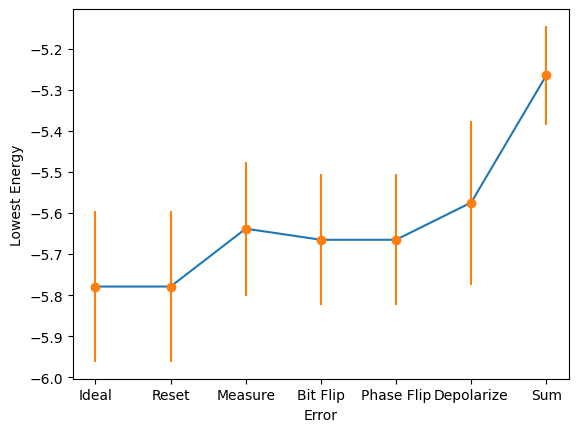

In [42]:
import matplotlib.pyplot as plt

x = ["Ideal", "Reset", "Measure", "Bit Flip", "Phase Flip", "Depolarize", "Sum"]
y = [mean_ideal, mean_rst, mean_measure, mean_bit, mean_phase, mean_depo, mean_all]
yerr = [2*np.sqrt(var_ideal), 2*np.sqrt(var_rst), 2*np.sqrt(var_measure), 2*np.sqrt(var_bit), 2*np.sqrt(var_phase), 2*np.sqrt(var_depo), 2*np.sqrt(var_all)]

plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, fmt ='o')
plt.xlabel('Error')
plt.ylabel('Lowest Energy')
plt.show()

In [43]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.3134999999999994
       x: [ 3.104e-01  5.937e+00  6.681e+00  6.635e+00  5.006e+00
            5.497e+00  5.517e+00  2.420e+00  2.234e+00]
    nfev: 143
   maxcv: 0.0

# VQE in IBM Hardware (IBM CUSCO)

use parameter optimized in Noiseless Simulator & just conduct measurement for 10 times

## optimization_level = 3 resilence_level = 0

In [46]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [47]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

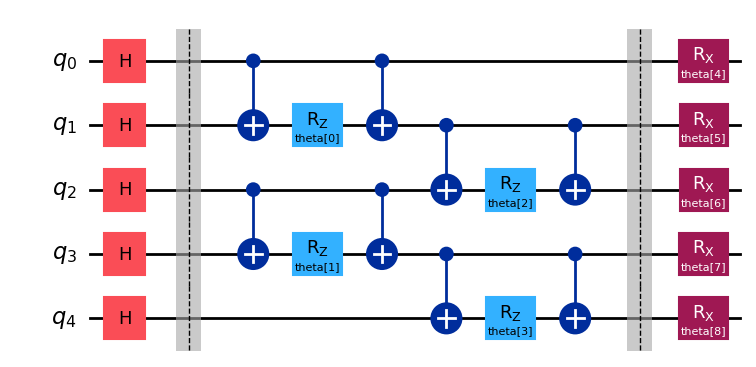

In [48]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [49]:
service = QiskitRuntimeService()

backend = service.backend("ibm_nazca")
print(backend)

<IBMBackend('ibm_nazca')>


In [50]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 0

estimator = Estimator(backend=backend, options=options)

In [51]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 1

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_nazca")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 1

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 2

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_nazca")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 2

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 3

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibm_nazca")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 3

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8000).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Lowest Energy

Optimization_level=3 & Resilence_level=0

[-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258]

Optimization_level=3 & Resilence_level=1

[-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458]

Optimization_level=3 & Resilence_level=2

[-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282]

Optimization_level=3 & Resilence_level=3

[-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837]

In [ ]:
# When Optimization_level=3 & Resilence_level=0

local_minimum_list = np.array([-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258])

mean_0 = np.mean(local_minimum_list)
var_0 = np.var(local_minimum_list)
max_0 = np.max(local_minimum_list)
min_0 = np.min(local_minimum_list)

print("mean : {0}".format(mean_0))
print("variance : {0}".format(var_0))
print("maximum : {0}".format(max_0))
print("minimum : {0}".format(min_0))
print()
print(local_minimum_list)

mean : -5.2489746109999995
variance : 0.005482909620489517
maximum : -5.06079102
minimum : -5.31274414

[-5.06079102 -5.26391602 -5.17651367 -5.2253418  -5.31274414 -5.31054688
 -5.2878418  -5.27050781 -5.28540039 -5.29614258]


In [ ]:
# When Optimization_level=3 & Resilence_level=1

local_minimum_list = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

mean_1 = np.mean(local_minimum_list)
var_1 = np.var(local_minimum_list)
max_1 = np.max(local_minimum_list)
min_1 = np.min(local_minimum_list)

print("mean : {0}".format(mean_1))
print("variance : {0}".format(var_1))
print("maximum : {0}".format(max_1))
print("minimum : {0}".format(min_1))
print()
print(local_minimum_list)

mean : -5.722296947
variance : 0.0014535559200360005
maximum : -5.64541463
minimum : -5.76632458

[-5.72749676 -5.72937777 -5.73962453 -5.7612482  -5.68476149 -5.6843978
 -5.64541463 -5.76621523 -5.71810848 -5.76632458]


In [ ]:
# When Optimization_level=3 & Resilence_level=2

local_minimum_list = np.array([-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282])

mean_2 = np.mean(local_minimum_list)
var_2 = np.var(local_minimum_list)
max_2 = np.max(local_minimum_list)
min_2 = np.min(local_minimum_list)

print("mean : {0}".format(mean_2))
print("variance : {0}".format(var_2))
print("maximum : {0}".format(max_2))
print("minimum : {0}".format(min_2))
print()
print(local_minimum_list)

mean : -5.702974453000001
variance : 0.001118643405856558
maximum : -5.62487282
minimum : -5.74666425

[-5.69306641 -5.74666425 -5.69708356 -5.7189238  -5.70712288 -5.67600891
 -5.72470249 -5.74243537 -5.69886404 -5.62487282]


In [ ]:
# When Optimization_level=3 & Resilence_level=3

local_minimum_list = np.array([-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837])

mean_3 = np.mean(local_minimum_list)
var_3 = np.var(local_minimum_list)
max_3 = np.max(local_minimum_list)
min_3 = np.min(local_minimum_list)

print("mean : {0}".format(mean_3))
print("variance : {0}".format(var_3))
print("maximum : {0}".format(max_3))
print("minimum : {0}".format(min_3))
print()
print(local_minimum_list)

mean : -5.726894045
variance : 0.20689547749241513
maximum : -4.62640797
minimum : -6.22839352

[-6.22839352 -4.62640797 -6.19686491 -5.54156607 -5.65017652 -5.74497337
 -6.03524048 -5.48405816 -5.61264108 -6.14861837]


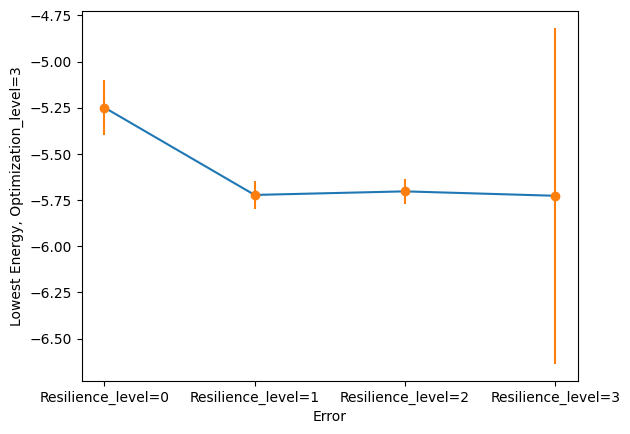

In [ ]:
import matplotlib.pyplot as plt

x = ["Resilience_level=0", "Resilience_level=1", "Resilience_level=2", "Resilience_level=3"]
y = [mean_0,mean_1,mean_2,mean_3]
yerr = [2*np.sqrt(var_0), 2*np.sqrt(var_1), 2*np.sqrt(var_2), 2*np.sqrt(var_3)]

plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, fmt ='o')
plt.xlabel('Error')
plt.ylabel('Lowest Energy, Optimization_level=3')
plt.show()

In [44]:
dct = {0: 0.000703318749639, 1: 0.00279701230776, 2: 0.018962583903367, 3: 0.004633930511633, 4: 0.006873627806736, 5: 0.033051991418439, 6: 0.019247714308425, 7: 0.005906259179086, 8: 0.015282054058638, 9: 0.084477253768211, 10: 0.147913247730329, 11: 0.033322767782439, 12: 0.015974756754199, 13: 0.078755517519148, 14: 0.025803949922671, 15: 0.009556648531217, 16: 0.003014439712155, 17: 0.021196278884722, 18: 0.07334858435814, 19: 0.01789682068835, 20: 0.027081690130632, 21: 0.128669683874592, 22: 0.071120033379857, 23: 0.021254392687701, 24: 0.005067797516043, 25: 0.035538049235404, 26: 0.053010842498968, 27: 0.01443383641633, 28: 0.003419917110751, 29: 0.017811049699612, 30: 0.002038596308552, 31: 0.001835353246256}

In [45]:
sum = 0
for i in range(32):
  sum = sum + dct[i]

sum

1.0000000000000018